## Лекция 2  BM5    

### TfidfVectorizer

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
 
# инициализируем
vectorizer = TfidfVectorizer()

# составляем корпус документов
corpus = [
  'слово1 слово2 слово3',
  'слово2 слово3',
  'слово1 слово2 слово1',
  'слово4'
]

# считаем
X = vectorizer.fit_transform(corpus)
 
# получится следующая структура:
#        |  слово1  |  слово2  |  слово3  |  слово4
# текст1 |   0.6    |    0.5   |   0.6    |    0
# текст2 |   0      |    0.6   |   0.8    |    0
# текст3 |   0.9    |    0.4   |   0      |    0
# текст4 |   0      |    0     |   0      |    1
 
# чтобы получить сгенерированный словарь, из приведенной структуры TfidfVectorizer
# порядок совпадает с матрицей
vectorizer.get_feature_names()  # ['слово1', 'слово2', 'слово3', 'слово4']
 
# чтобы узнать индекс токена в словаре
vectorizer.vocabulary_.get('слово3') # вернет 2
 
# показать матрицу
X.toarray()
 
# теперь можно быстро подсчитать вектор для нового документа
new_doc = vectorizer.transform(['слово1 слово4 слово4']).toarray()  # результат [[0.36673901, 0, 0, 0.93032387]]

In [176]:
 import pandas as pd

In [177]:
answers_data = pd.read_excel("answers_base.xlsx")
queries_data = pd.read_excel("queries_base.xlsx")

In [178]:
answers_data.head()

,Номер связки,Текст вопросов,Текст ответа,Тематика
0,57,У ребенка в школе продлили каникулы. Могу ли я...,Листок временной нетрудоспособности (больничны...,БОЛЬНИЧНЫЙ ЛИСТ
1,78,Где сделать вакцинацию от коронавируса?\nСущес...,"Коронавирусы - это целое семейство вирусов, ко...",ВАКЦИНАЦИЯ
2,326,Сколько стоит сделать вакцину от гриппа?\nМожн...,Бесплатно пройти вакцинацию можно в Вашей меди...,ВАКЦИНАЦИЯ
3,327,Могу я отказаться от вакцинации?\nВ каких случ...,Согласно приказу Министерства здравоохранения ...,ВАКЦИНАЦИЯ
4,328,Безопасна ли вакцинация?\nОпасна ли вакцинация...,В соответствии с пунктами 1 и 2 статьи 12 Феде...,ВАКЦИНАЦИЯ


In [180]:
queries_data = queries_data.drop(columns=["Unnamed: 3", "Unnamed: 4"])
queries_data.head()

,Текст вопроса,Номер связки,Тематика
0,с уважением Вероника Игоревна Ильич\n\nПосле ...,308.0,"ЗАКРЫТИЕ ГРАНИЦ, ОТКРЫТИЕ ГРАНИЦ РОССИИ И АВИА..."
1,"Здравствуйте! Проинформируйте, пожалуйста, нуж...",324.0,ОРГАНИЗАЦИИ ОТДЫХА ДЕТЕЙ И ИХ ЗДОРОВЛЕНИЯ
2,"--\nДобрый день!\n Меня, Сидельникова Андрея...",57.0,БОЛЬНИЧНЫЙ ЛИСТ
3,Добрый день.\nВ Кемеровской области согласно п...,45.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ"
4,"Здравствуйте, в моем городе Кострома введено о...",3.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ"


In [183]:
import re
from razdel import tokenize
from nltk.corpus import stopwords
stops = stopwords.words("russian")

In [184]:
stops.extend(['здравствуйте', 'добрый', 'день'])
print(stops)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [185]:
def tokenizer(text_data):
    tokens = [_.text for _ in list(tokenize(str(text_data).lower())) if not re.search('[^а-яА-ЯёЁa-zA-z]', _.text)]
    return " ".join(tokens)

In [186]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [187]:
def lemmatizer(tokens):
    lem_text = []
    for word in tokens.split(" "):
        lem = morph.parse(word)[0].normal_form
        if lem not in stops:
            lem_text.append(lem)
    return ' '.join(lem_text)

In [188]:
from tqdm.auto import tqdm
tqdm.pandas()

In [189]:
test = queries_data["Текст вопроса"][3]
print(test, "\n=====\n")

test_tokens = tokenizer(test)
print(test_tokens, "\n=====\n")

test_lem = lemmatizer(test_tokens)
print(test_lem, "\n=====\n")

Добрый день.
В Кемеровской области согласно постановлению Администрации необходимо организовать изолятор для временного содержания больного сотрудника до передачи его в скорую. Планируем организовать изолятор в помещении раздевалки, отгородив часть помещения пленкой от пола до потолка. Разрешается ли такое, так как место ограничено и свободных помещений нет. 

Отправлено с iPhone
 
=====

добрый день в кемеровской области согласно постановлению администрации необходимо организовать изолятор для временного содержания больного сотрудника до передачи его в скорую планируем организовать изолятор в помещении раздевалки отгородив часть помещения пленкой от пола до потолка разрешается ли такое так как место ограничено и свободных помещений нет отправлено с iphone 
=====

кемеровский область согласно постановление администрация необходимый организовать изолятор временной содержание больной сотрудник передача скорый планировать организовать изолятор помещение раздевалка отгородить часть помещен

In [190]:
queries_data["tokens"] = queries_data["Текст вопроса"].progress_apply(tokenizer)
queries_data["lemm"] = queries_data["tokens"].progress_apply(lemmatizer)
queries_data.head()

,Текст вопроса,Номер связки,Тематика,tokens,lemm
0,с уважением Вероника Игоревна Ильич\n\nПосле ...,308.0,"ЗАКРЫТИЕ ГРАНИЦ, ОТКРЫТИЕ ГРАНИЦ РОССИИ И АВИА...",с уважением вероника игоревна ильич после авгу...,уважение вероника игорь илья август год москва...
1,"Здравствуйте! Проинформируйте, пожалуйста, нуж...",324.0,ОРГАНИЗАЦИИ ОТДЫХА ДЕТЕЙ И ИХ ЗДОРОВЛЕНИЯ,здравствуйте проинформируйте пожалуйста нужен ...,здравствовать проинформировать пожалуйста нужн...
2,"--\nДобрый день!\n Меня, Сидельникова Андрея...",57.0,БОЛЬНИЧНЫЙ ЛИСТ,добрый день меня сидельникова андрея олеговича...,сидельников андрей олег год р посадить каранти...
3,Добрый день.\nВ Кемеровской области согласно п...,45.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ",добрый день в кемеровской области согласно пос...,кемеровский область согласно постановление адм...
4,"Здравствуйте, в моем городе Кострома введено о...",3.0,"ШТРАФЫ, НОРМАТИВНЫЕ АКТЫ И РЕКОМЕНДАЦИИ",здравствуйте в моем городе кострома введено ог...,здравствовать мыть город кострома ввести огран...


In [191]:
answers_data["tokens"] = answers_data["Текст ответа"].progress_apply(tokenizer)
answers_data["lemm"] = answers_data["tokens"].progress_apply(lemmatizer)
answers_data.head()

,Номер связки,Текст вопросов,Текст ответа,Тематика,tokens,lemm
0,57,У ребенка в школе продлили каникулы. Могу ли я...,Листок временной нетрудоспособности (больничны...,БОЛЬНИЧНЫЙ ЛИСТ,листок временной нетрудоспособности больничный...,листок временной нетрудоспособность больничный...
1,78,Где сделать вакцинацию от коронавируса?\nСущес...,"Коронавирусы - это целое семейство вирусов, ко...",ВАКЦИНАЦИЯ,коронавирусы это целое семейство вирусов котор...,коронавирус это целое семейство вирус который ...
2,326,Сколько стоит сделать вакцину от гриппа?\nМожн...,Бесплатно пройти вакцинацию можно в Вашей меди...,ВАКЦИНАЦИЯ,бесплатно пройти вакцинацию можно в вашей меди...,бесплатно пройти вакцинация ваш медицинский ор...
3,327,Могу я отказаться от вакцинации?\nВ каких случ...,Согласно приказу Министерства здравоохранения ...,ВАКЦИНАЦИЯ,согласно приказу министерства здравоохранения ...,согласно приказ министерство здравоохранение м...
4,328,Безопасна ли вакцинация?\nОпасна ли вакцинация...,В соответствии с пунктами 1 и 2 статьи 12 Феде...,ВАКЦИНАЦИЯ,в соответствии с пунктами и статьи федеральног...,соответствие пункт статья федеральный закон им...


## Функция ранжирования bm25

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
from math import log

Для обратного индекса есть общепринятая формула для ранжирования *Okapi best match 25* ([Okapi BM25](https://ru.wikipedia.org/wiki/Okapi_BM25)).    
Пусть дан запрос $Q$, содержащий слова  $q_1, ... , q_n$, тогда функция BM25 даёт следующую оценку релевантности документа $D$ запросу $Q$:

$$ score(D, Q) = \sum_{i}^{n} \text{IDF}(q_i)*\frac{TF(q_i,D)*(k+1)}{TF(q_i,D)+k(1-b+b\frac{l(d)}{avgdl})} $$ 
где   
>$TF(q_i,D)$ - частота слова $q_i$ в документе $D$      
$l(d)$ - длина документа (количество слов в нём)   
*avgdl* — средняя длина документа в коллекции    
$k$ и $b$ — свободные коэффициенты, обычно их выбирают как $k$=2.0 и $b$=0.75   
$$$$
$\text{IDF}(q_i)$ - это модернизированная версия IDF: 
$$\text{IDF}(q_i) = \log\frac{N-n(q_i)+0.5}{n(q_i)+0.5},$$
>> где $N$ - общее количество документов в коллекции   
$n(q_i)$ — количество документов, содержащих $q_i$

In [316]:
count_vectorizer = CountVectorizer()
corpora = answers_data["lemm"]
count_matrix = count_vectorizer.fit_transform(corpora)
count_matrix.shape

(43, 2623)

In [399]:
k = 2.0
b = 0.75

length = count_matrix.sum(axis=1)
avgdl = length.mean()

# def new_tf(q_i, D_i):
#     tf = int(count_matrix[D_i, q_i])
#     return (tf * (k+1)) / (tf + k * (1 - b + b * (int(length[D_i])/avgdl) ))

def new_tf(count_matrix):
    return (count_matrix * (k+1)) / (count_matrix + k * (1 - b + b * (length/avgdl) ))

tf_matrix = new_tf(count_matrix)
tf_matrix.shape

(43, 2623)

In [400]:
N = count_matrix.shape[0]

def idf(i):
    res = log( (N - n[0, i] + 0.5) / (n[0, i] + 0.5) )
    return res

idf_vector = np.array([idf(i) for i in range(count_matrix.shape[1])])
idf_vector.shape

(2623,)

### __Задача 1__:    
Реализуйте поиск с метрикой *TF-IDF* через умножение матрицы на вектор.
Что должно быть в реализации:
- проиндексированная база, где каждый документ представлен в виде вектора TF-IDF
- функция перевода входяшего запроса в вектор по метрике TF-IDF
- ранжирование докуменов по близости к запросу по убыванию

В качестве корпуса возьмите корпус вопросов в РПН по Covid2019. Он состоит из:
> файл **answers_base.xlsx** - база ответов, у каждого ответа есть его номер, тематика и примеры вопросов, которые могут быть заданы к этому ответу. Сейчас проиндексировать надо именно примеры вопросов в качестве документов базы. Понимаете почему?

> файл **queries_base.xlsx** - вопросы юзеров, к каждому из которых проставлен номер верного ответа из базы. Разделите эти вопросы в пропорции 70/30 на обучающую (проиндексированную как база) и тестовую (как запросы) выборки. 


In [401]:
vectorizer = TfidfVectorizer(analyzer=str.split)
corpora = answers_data["lemm"]
X = vectorizer.fit_transform(corpora)
X.shape

(43, 2630)

In [402]:
def get_answer(querry_lem):
    q_vec = vectorizer.transform([querry_lem]).toarray()
    res = np.dot(X.toarray(), q_vec.T)
    index = np.argmax(res)
    return answers_data["Номер связки"][index]

In [403]:
test_id = 18
test_q = queries_data["Текст вопроса"][test_id]
test_lem = queries_data["lemm"][test_id]
print(test_q)
index = get_answer(test_lem)
print(index, queries_data["Номер связки\n"][test_id])

Не могу найти рекомендации до тех, кто возвращается из Турции, не могли бы помочь ? 
Sent from my iPhone
45 308.0


In [197]:
queries_data["pred"] = queries_data["lemm"].progress_apply(get_answer)

In [208]:
(queries_data['pred'] == queries_data['Номер связки\n']).sum() / len(queries_data)

0.2905611135276207

То же самое, но не для пользовательских вопросов, а для вопросов из базы

In [411]:
question_index = {}
for question_chunk, answer_n in answers_data[["Текст вопросов", "Номер связки"]].values:
    questions = question_chunk.split('\n')
    for q in questions:
        lem_q = lemmatizer(tokenizer(q))
        if lem_q != "":
            question_index[lem_q] = answer_n
            
question_df = pd.DataFrame({"question": q, "index": i} for q,i in question_index.items())
question_df.head()

,index,question
0,57,ребёнок школа продлить каникулы мочь взять бол...
1,57,больничный лист
2,57,компенсация случай разница оплата больничный з...
3,57,оплачиваться больничный коронавирус
4,57,контактный дать больничный


In [412]:
question_df["pred"] = question_df["question"].progress_apply(get_answer)

In [413]:
(question_df['pred'] == question_df['index']).sum() / len(question_df)

0.5403973509933775

### __Задача 2__:    
Аналогичная задаче1 с другой метрикой 

Реализуйте поиск с метрикой *BM25* через умножение матрицы на вектор. Что должно быть в реализации:

- проиндексированная база, где каждый документ представлен в виде вектора BM25
- функция перевода входяшего запроса в вектор по метрике BM25
- ранжирование докуменов по близости к запросу по убыванию

In [414]:
def bm25_search(q):
    q_vec = count_vectorizer.transform([q]).toarray()
    mask = q_vec * idf_vector
    res = np.dot(tf_matrix, mask.T)
    index = np.argmax(res)
    return answers_data["Номер связки"][index]

In [415]:
question_df["pred_bm25"] = question_df["question"].progress_apply(bm25_search)

In [416]:
(question_df['pred_bm25'] == question_df['index']).sum() / len(question_df)

0.5019867549668874

In [417]:
question_df

,index,question,pred,pred_bm25
0,57,ребёнок школа продлить каникулы мочь взять бол...,10,10
1,57,больничный лист,57,5
2,57,компенсация случай разница оплата больничный з...,57,57
3,57,оплачиваться больничный коронавирус,57,57
4,57,контактный дать больничный,1,57
5,57,компенсировать разница оплата больничный реаль...,57,57
6,57,мочь получить больничный лист находиться самои...,5,5
7,57,дать больничный контактировать больной,40,57
8,57,мочь получить дистанционный оплачивать больнич...,40,5
9,57,листок нетрудоспособность,57,57


In [418]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

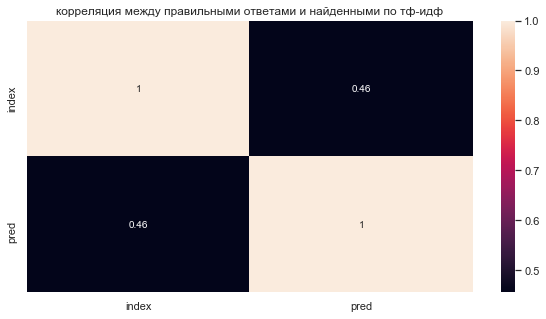

In [422]:
corr_df = question_df[["index", "pred"]].corr()

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    data=corr_df, 
    annot=True,
    ax=ax
)
plt.title("корреляция между правильными ответами и найденными по тф-идф")
plt.show()

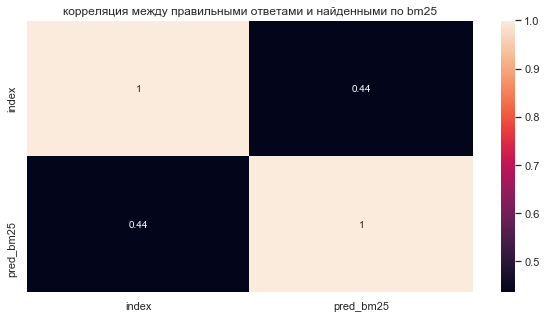

In [423]:
corr_df = question_df[["index", "pred_bm25"]].corr()

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    data=corr_df, 
    annot=True,
    ax=ax
)
plt.title("корреляция между правильными ответами и найденными по bm25")
plt.show()

_Анна Полянская, БКЛ171_